In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
microsoft-catsvsdogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
import os

# Create a directory for the dataset
os.makedirs('cats-vs-dogs', exist_ok=True)

# Extract the dataset
with zipfile.ZipFile('microsoft-catsvsdogs-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('cats-vs-dogs')

In [4]:
!ls cats-vs-dogs/PetImages

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [6]:
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = 1 if 'Dog' in folder else 0  # 1 for dog, 0 for cat
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Load train images
cats_folder = 'cats-vs-dogs/PetImages/Cat'
dogs_folder = 'cats-vs-dogs/PetImages/Dog'

cat_images, cat_labels = load_images_from_folder(cats_folder)
dog_images, dog_labels = load_images_from_folder(dogs_folder)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

# Normalize the images
X = X / 255.0

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Flatten the images
X_flattened = X.reshape(X.shape[0], -1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y_encoded, test_size=0.2, random_state=42)

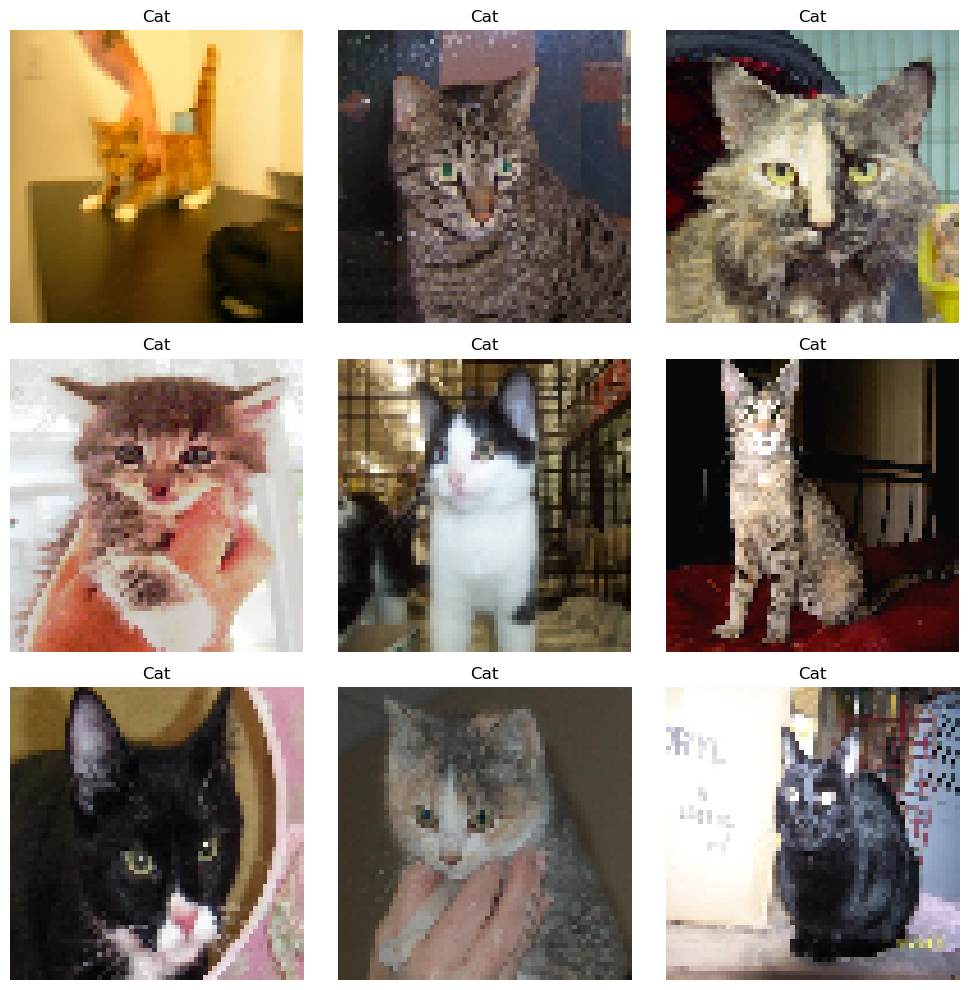

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            img = cv2.resize(img, img_size)
            images.append(img)
    return images

# Paths to the dataset folders
cats_folder = 'cats-vs-dogs/PetImages/Cat'
dogs_folder = 'cats-vs-dogs/PetImages/Dog'

# Load cat and dog images
cat_images = load_images_from_folder(cats_folder)
dog_images = load_images_from_folder(dogs_folder)

# Plotting a grid of images
plt.figure(figsize=(10, 10))
for i in range(9):  # Change the range as per the number of images you want to display
    plt.subplot(3, 3, i + 1)
    if i < len(cat_images):
        plt.imshow(cat_images[i])
        plt.title('Cat')
    else:
        plt.imshow(dog_images[i - len(cat_images)])
        plt.title('Dog')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Assuming you have already loaded and preprocessed your dataset, and split into X_train, X_test, y_train, y_test

# Step 1: Apply PCA
from sklearn.decomposition import PCA

# Reduce dimensionality to 100 components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# Step 2: Subset Selection
# Use a smaller subset of the data for training (e.g., first 1000 samples)
X_train_subset = X_train_pca[:1000]
y_train_subset = y_train[:1000]

In [10]:
# Step 3: Train the SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train the SVM with a linear kernel
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_subset, y_train_subset)

SVC(kernel='linear', probability=True)

In [11]:
# Step 4: Evaluation
# Predict on the entire test set
y_pred = svm.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.57      0.51      0.54      2547
           1       0.54      0.59      0.56      2443

    accuracy                           0.55      4990
   macro avg       0.55      0.55      0.55      4990
weighted avg       0.55      0.55      0.55      4990

Accuracy: 0.5496993987975952
